In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/DsAi_Msc/CS5617_Data_Science/week 5/movies.csv'
df = pd.read_csv(file_path)
df.info(verbose=True)

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### .

In [ ]:
df.shape

(7668, 15)

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
print("numeric columns", numeric_cols)

non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print("non numeric columns",non_numeric_cols)

numeric columns Index(['year', 'score', 'votes', 'budget', 'gross', 'runtime'], dtype='object')
non numeric columns Index(['name', 'rating', 'genre', 'released', 'director', 'writer', 'star',
       'country', 'company'],
      dtype='object')


In [ ]:
num_missing = df.isna().sum()
num_missing[:20]

,0
name,0
rating,77
genre,0
year,0
released,2
score,3
votes,3
director,0
writer,3
star,1


In [ ]:
df_copy = df.copy()
med = df_copy[numeric_cols].median()
df_copy[numeric_cols] = df_copy[numeric_cols].fillna(med)

In [ ]:
most_freq = df_copy[non_numeric_cols].describe().loc['top']
most_freq
df_copy[non_numeric_cols] = df_copy[non_numeric_cols].fillna(most_freq)

In [ ]:
df_copy.info(verbose=True)
df_copy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7668 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7668 non-null   object 
 5   score     7668 non-null   float64
 6   votes     7668 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7668 non-null   object 
 9   star      7668 non-null   object 
 10  country   7668 non-null   object 
 11  budget    7668 non-null   float64
 12  gross     7668 non-null   float64
 13  company   7668 non-null   object 
 14  runtime   7668 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### .

1. Scatter plots
2. Heatmap
3. Perform appropriate correlation matrix
4. Comment on the relationship genre and running time
5. Comment on the relationship budget and running time
6. Comment on the relationship genre and country

col - genre, running time, budget, country

### 1. Scatter plots

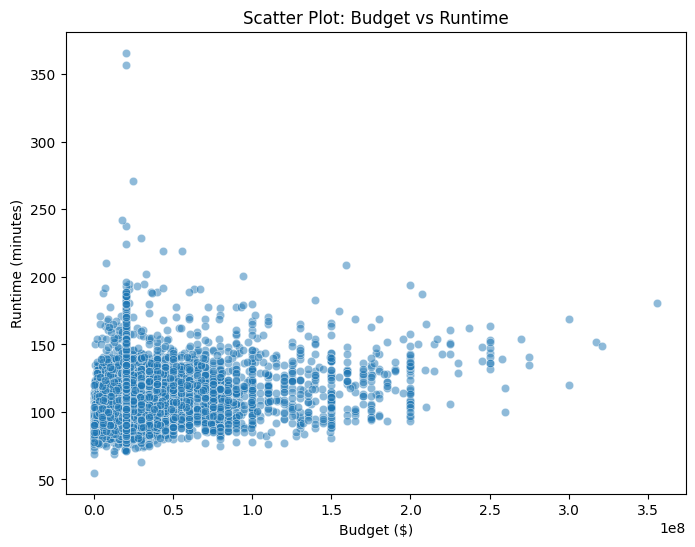

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: Budget vs Runtime
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_copy['budget'], y=df_copy['runtime'], alpha=0.5)
plt.xlabel("Budget ($)")
plt.ylabel("Runtime (minutes)")
plt.title("Scatter Plot: Budget vs Runtime")
plt.show()

### 2. Heatmap

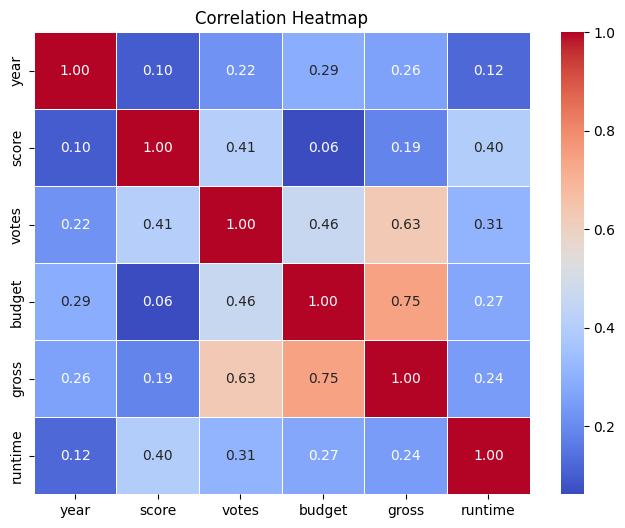

In [ ]:
# Correlation Heatmap
# numeric columns = ['year', 'score', 'votes', 'budget', 'gross', 'runtime']

correlation_matrix = df_copy[['year', 'score', 'votes', 'budget', 'gross', 'runtime']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### 3. Perform appropriate correlation matrix

In [ ]:
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
             year     score     votes    budget     gross   runtime
year     1.000000  0.098013  0.222573  0.291690  0.259504  0.120662
score    0.098013  1.000000  0.409157  0.061931  0.185563  0.399407
votes    0.222573  0.409157  1.000000  0.460968  0.632120  0.309151
budget   0.291690  0.061931  0.460968  1.000000  0.745881  0.273371
gross    0.259504  0.185563  0.632120  0.745881  1.000000  0.244380
runtime  0.120662  0.399407  0.309151  0.273371  0.244380  1.000000


### 4. Comment on the relationship genre and running time

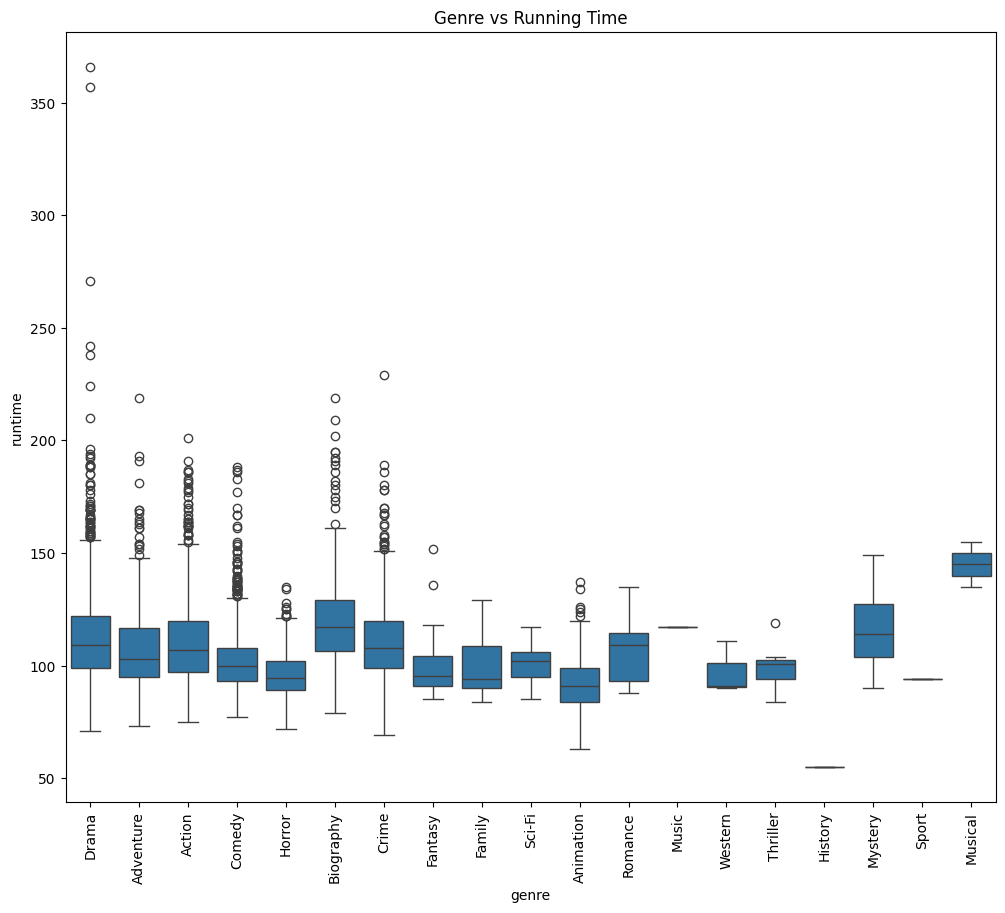

In [ ]:
# Step 3: Comments on Relationships
# Genre vs Running Time (Box plot)

plt.figure(figsize=(12, 10))
sns.boxplot(data=df_copy, x='genre', y='runtime')
plt.title("Genre vs Running Time")
plt.xticks(rotation=90)
plt.show()

**Observations:**

1. Median Runtime: Most genres have a median runtime between 90 to 120 minutes, which is typical for movies.

2. Drama: These genres tend to have longer movies, with many outliers exceeding 150 minutes. This is likely due to their narrative depth and detailed storytelling.

3. Musicals: Musical movies show a higher median runtime, and they also have fewer outliers, indicating more consistency in movie lengths.

4. Sport and History: These genres generally have shorter movies with a tighter range

5. Biography and Mystery: These genres show a wider distribution, which is more likely to resemble a normal distribution.

### 5. Comment on the relationship budget and running time

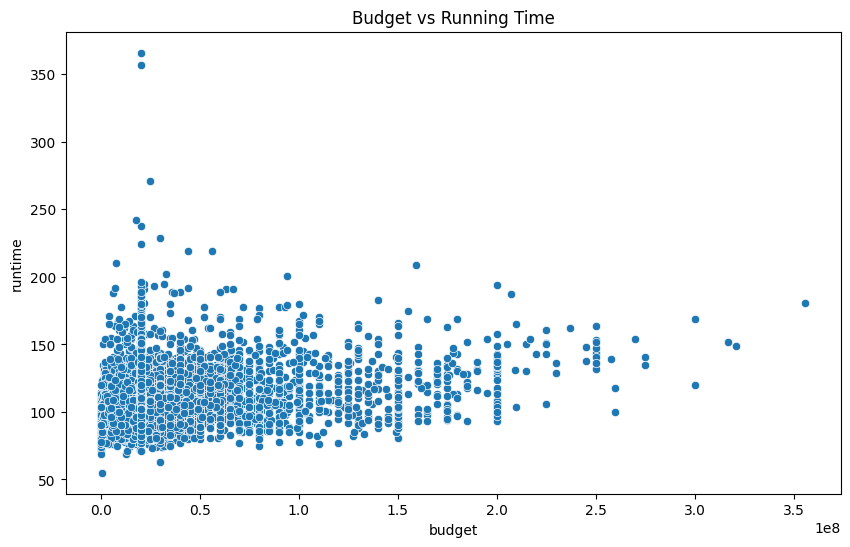

In [ ]:
# Step 4: Comments on Relationships
# Budget vs Running Time (Scatter)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x='budget', y='runtime')
plt.title("Budget vs Running Time")
plt.show()

Observations:

1. Concentration at Lower Budgets: Most movies are clustered at lower budget ranges (under $50 million), with a typical runtime between 90 to 150 minutes.
  
2. No Clear Trend: There is no strong correlation between budget and runtime. Higher-budget movies tend to have varied runtimes, indicating budget is not a decisive factor in determining movie length.
  
3. Outliers: A few movies with exceptionally long runtimes (over 200 minutes) appear, regardless of their budget.

### 6. Comment on the relationship genre and country

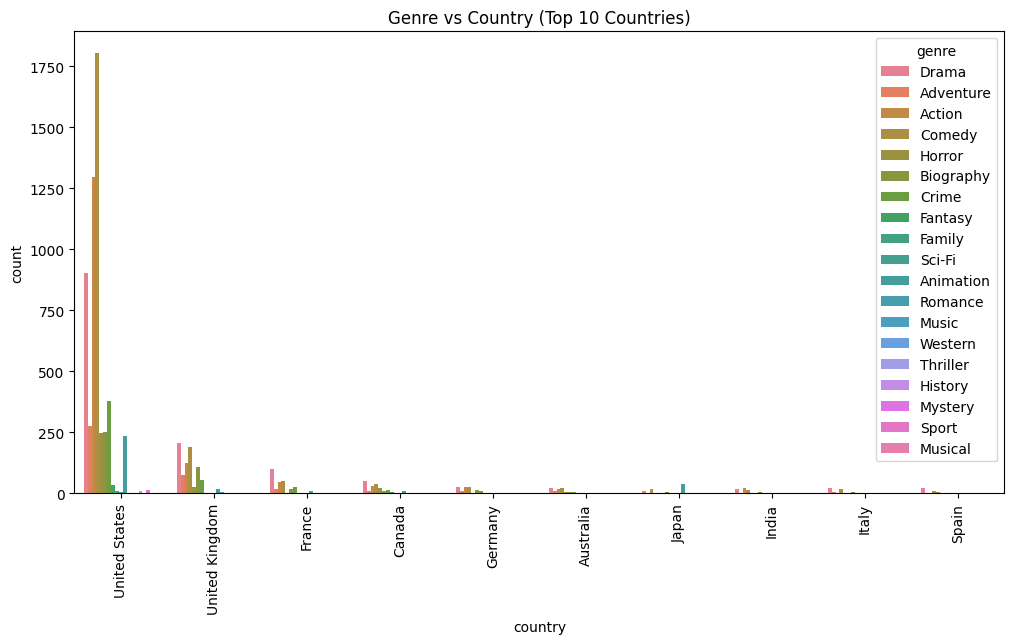

In [ ]:
# Step 6: Comments on Relationships
# Genre vs Country (Count Plot)

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='country', hue='genre', order=df['country'].value_counts().index[:10])
plt.title("Genre vs Country (Top 10 Countries)")
plt.xticks(rotation=90)
plt.show()

**Observations:**

1. Dominance of the United States: The United States produces the highest number of movies across almost all genres, with Drama, Comedy, and Action being the most popular.

2. Genre Variety in the United Kingdom: The United Kingdom shows significant contributions across multiple genres, particularly Drama and Comedy.

3. Smaller Counts in Other Countries: France, Canada, and Germany follow with moderate contributions, primarily in Drama and Comedy genres.

4. Limited Production: Countries like Japan, India, Italy, and Spain produce fewer movies in the top genres, showing more limited representation.

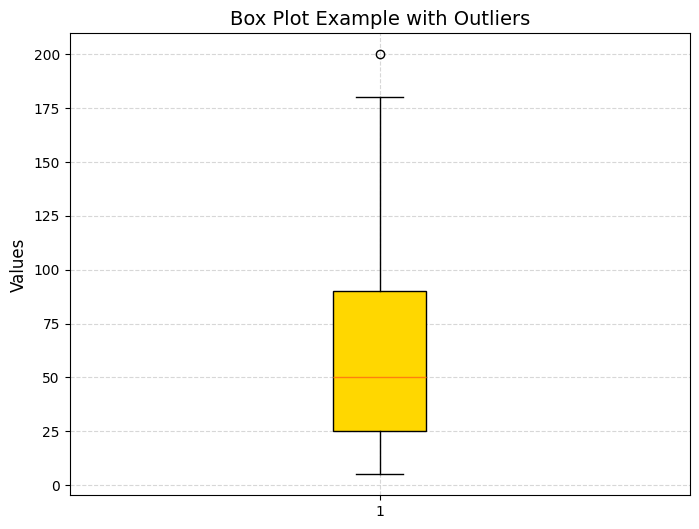

In [ ]:
data_with_outliers = [12, 15, 14, 10, 18, 22, 25, 30, 35, 40, 42, 45, 48, 50, 55, 60, 62, 70, 75, 80, 90, 120, 150, 160, 170, 175, 180, 200, 5]

# Plotting the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(data_with_outliers, vert=True, patch_artist=True, boxprops=dict(facecolor="#FFD700"))

# Adding labels
plt.title("Box Plot Example with Outliers", fontsize=14)
plt.ylabel("Values", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [ ]:
len(data_with_outliers)

29

In [ ]:
import numpy as np

q1 = np.percentile(data_with_outliers, 25)  # Calculate Q1 (25th percentile)
q3 = np.percentile(data_with_outliers, 75)  # Calculate Q3 (75th percentile)

print("Q1:", q1)
print("Q3:", q3)

Q1: 25.0
Q3: 90.0


In [ ]:
median = np.median(data_with_outliers)

print("Median:", median)

Median: 50.0


In [ ]:
count1 = data_with_outliers.count(25)
print("25 count (q1):", count1)

count2 = data_with_outliers.count(50)
print("50 count (q2):", count2)

count3 = data_with_outliers.count(90)
print("90 count (q3):", count3)

25 count (q1): 1
50 count (q2): 1
90 count (q3): 1


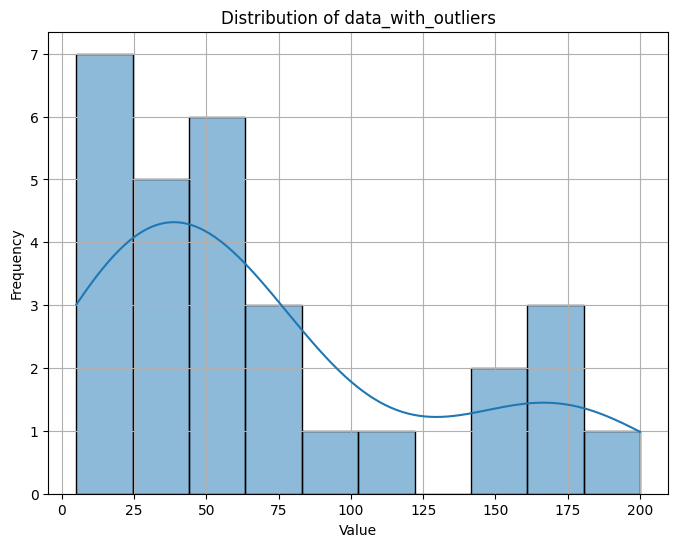

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.histplot(data_with_outliers, bins=10, kde=True)  # Create histogram with 10 bins and KDE

plt.title("Distribution of data_with_outliers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)

plt.show()